In [2]:
# import necessary libraries
import itertools
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models 

from gensim import corpora
from gensim.models import CoherenceModel,LsiModel
from sklearn.metrics import silhouette_samples, silhouette_score


In [3]:
def force_format(texts):
    return [str(t) for t in texts]

In [4]:
dataset = pd.read_json("News_Category_Dataset_v2.json", lines=True, dtype={"headline": str})

In [5]:
texts = force_format(dataset["headline"])

In [6]:
def compute_word_occurences(texts):
    words = itertools.chain.from_iterable(texts)
    word_count = pd.Series(words).value_counts()
    word_count = pd.DataFrame({"Word": word_count.index, "Count": word_count.values})
    return word_count

In [7]:
def get_l_texts(text_file):
    l_texts=[]
    with open(text_file, "r") as f:
        line = f.readlines()
        list_line = [l.strip() for l in line]
        for l in list_line:
            l_texts.append(ast.literal_eval(l))
    return l_texts

In [8]:
l_texts = get_l_texts("l_texts.txt")
print(l_texts[:10])

[['mass_shooting', 'texas', 'week', 'tv'], ['smith', 'join', 'diplo', 'nicky', 'jam', 'world_cup', 'official', 'song'], ['hugh', 'grant', 'marries', 'time', 'age'], ['jim_carrey', 'blasts', 'castrato', 'adam', 'schiff', 'democrats', 'artwork'], ['julianna', 'margulie', 'donald', 'poop', 'bag', 'pick', 'dog'], ['morgan_freeman', 'devastate', 'sexual_harassment', 'claim', 'undermine', 'legacy'], ['donald', 'lovin', 'mcdonald', 'jingle', 'tonight', 'bit'], ['watch', 'amazon', 'prime', 'week'], ['mike', 'myers', 'reveal', 'fourth', 'austin', 'power', 'film'], ['watch', 'hulu', 'week']]


# LSI

In [9]:
# Create a dictionary
dictionary = corpora.Dictionary(l_texts)

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in l_texts]

In [10]:
result={"num_topics":[], "coherence_score_cv":[],"coherence_score_npmi":[]}

for n in range(50, 60):
    lda_model = LsiModel(corpus, num_topics=n, id2word=dictionary)
    coherence_model_cv= CoherenceModel(model=lda_model, texts=l_texts, dictionary=dictionary, coherence='c_v')
    coherence_score_cv = coherence_model_cv.get_coherence()
    coherence_model_npmi= CoherenceModel(model=lda_model, texts=l_texts, dictionary=dictionary, coherence='c_npmi')
    coherence_score_npmi = coherence_model_npmi.get_coherence()
    print("Number of topics: ", n, " Coherence Score: ", coherence_score_npmi,coherence_score_cv)
    result["num_topics"].append(n)
    result["coherence_score_cv"].append(coherence_score_cv)
    result["coherence_score_npmi"].append(coherence_score_npmi)


c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprec

Number of topics:  50  Coherence Score:  -0.035524245242677124 0.2277880584799969


c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprec

Number of topics:  51  Coherence Score:  -0.03643373830441036 0.23573640303338414


c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprec

Number of topics:  52  Coherence Score:  -0.03405577342053809 0.23314914059809058


c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprec

Number of topics:  53  Coherence Score:  -0.03479994716439826 0.2394088130643406


c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprec

Number of topics:  54  Coherence Score:  -0.03718375313354922 0.2344684732694725


c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprec

Number of topics:  55  Coherence Score:  -0.038455562832386804 0.23676977773799437


c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprec

Number of topics:  56  Coherence Score:  -0.03724537474538376 0.23363187206315286


c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprec

Number of topics:  57  Coherence Score:  -0.03686691724923707 0.22902303068595165


c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprec

Number of topics:  58  Coherence Score:  -0.03900526338491333 0.23033065484304457


c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\Daito\miniconda3\envs\NLP\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprec

Number of topics:  59  Coherence Score:  -0.034439412749101034 0.23219844563091085


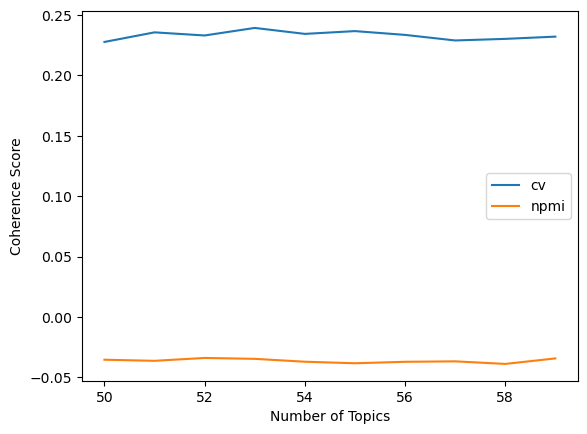

In [12]:
# Plot the coherence scores for elbow method

plt.plot(result["num_topics"], result["coherence_score_cv"])
plt.plot(result["num_topics"], result["coherence_score_npmi"])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend(("cv","npmi"), loc='best')
plt.show()